## Observations and Insights

## Dependencies and starter code

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
main_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
main_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [51]:
grouped_data = main_data.groupby('Drug Regimen')

mean_vol = grouped_data['Tumor Volume (mm3)'].mean()
median_vol = grouped_data['Tumor Volume (mm3)'].median()
var_vol = grouped_data['Tumor Volume (mm3)'].var()
std_vol = grouped_data['Tumor Volume (mm3)'].std()
sem_vol = grouped_data['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({'Tumor Volume Mean': mean_vol,
                              'Tumor Volume Median': median_vol,
                              'Tumor Volume Variance': var_vol,
                              'Tumor Volume StanDev': std_vol,
                              'Tumor Volume StanError': sem_vol})

summary_table = summary_table.applymap('{:.2f}'.format)

summary_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StanDev,Tumor Volume StanError
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

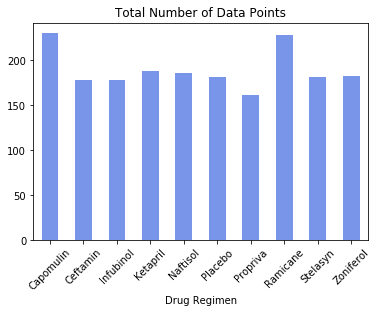

In [52]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

datapoints_sum = grouped_data.count()
datapoints_sum = datapoints_sum.sort_values('Drug Regimen')


datapoints_sum.plot.bar(title='Total Number of Data Points', legend=False, alpha=.70, rot=45, color='royalblue')


Text(0.5, 1.0, 'Total Number of Data Points')

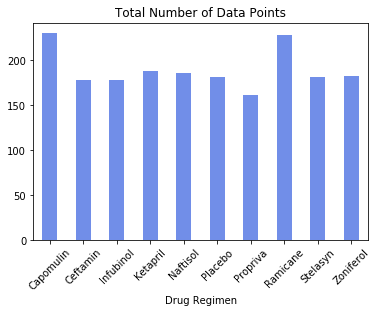

In [30]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(datapoints_sum))
tick_loc = [value for value in x_axis]

plt.bar(x_axis, datapoints_sum['Mouse ID'], width=.45, color = 'royalblue', alpha=.75, align = "center")


reg = list(datapoints_sum.index.values)


plt.xticks(tick_loc, reg, rotation=45)
plt.xlabel('Drug Regimen')
plt.xlim(-.5, len(x_axis) - .5)

plt.title('Total Number of Data Points')

## Pie plots

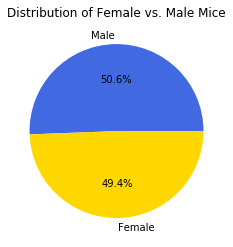

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexes = main_data['Sex'].value_counts()
sexes.plot.pie(title='Distribution of Female vs. Male Mice', label='', colors=['royalblue','gold'], autopct="%1.1f%%")

Text(0.5, 1.0, 'Distribution of Female vs. Male Mice')

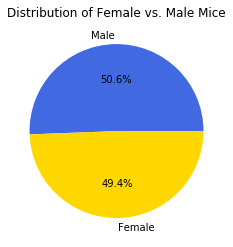

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
a = ['Male', 'Female']

plt.pie(sexes, labels=a, colors=['royalblue','gold'], autopct="%1.1f%%")
plt.title('Distribution of Female vs. Male Mice')

## Quartiles, outliers and boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [105]:
final_tumor = main_data.groupby(["Mouse ID"]).max()
final_tumor = final_tumor.reset_index()
final_tumor

merged_df = final_tumor[['Mouse ID','Timepoint']].merge(main_data,on=['Mouse ID','Timepoint'],how="left")


treatment = merged_df.set_index('Drug Regimen')
treatment = treatment.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],
                          ['Mouse ID', 'Tumor Volume (mm3)']]


treatment = treatment.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})
treatment['Final Tumor Volume (mm3)'] = treatment['Final Tumor Volume (mm3)'].map('{:.2f}'.format)

treatment

,Mouse ID,Final Tumor Volume (mm3)
Drug Regimen,,
Capomulin,b128,38.98
Capomulin,b742,38.94
Capomulin,f966,30.49
Capomulin,g288,37.07
Capomulin,g316,40.16
...,...,...
Ceftamin,x226,45.00
Ceftamin,x581,64.63
Ceftamin,x822,61.39


In [167]:
#IQR & Potential outliers
drug1 = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
drug2 = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
drug3 = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
drug4 = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

data = [drug1, drug2, drug3, drug4]
drug_names = ['Capomulin','Ramicane','Infubinol','Ceftamin']



for d,n in zip(data,drug_names):
    
    print(f'''{n}: Final Tumor Volume (mm3)
=====================================''')
    
    quartiles = d.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"Lower quartile: {round(lowerq,2)}")
    print(f"Upper quartile: {round(upperq,2)}")
    print(f"Interquartile range: {round(iqr,2)}")
    print(f"Median: {round(quartiles[0.5],2)} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")

    outliers = (((d < lower_bound)) | (d > upper_bound)).sum()
    print(f"Potential outliers: {outliers}\n\n\n")
    

Capomulin: Final Tumor Volume (mm3)
Lower quartile: 32.38
Upper quartile: 40.16
Interquartile range: 7.78
Median: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Potential outliers: 0



Ramicane: Final Tumor Volume (mm3)
Lower quartile: 31.56
Upper quartile: 40.66
Interquartile range: 9.1
Median: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Potential outliers: 0



Infubinol: Final Tumor Volume (mm3)
Lower quartile: 54.05
Upper quartile: 65.53
Interquartile range: 11.48
Median: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Potential outliers: 1



Ceftamin: Final Tumor Volume (mm3)
Lower quartile: 48.72
Upper quartile: 64.3
Interquartile range: 15.58
Median: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
Potential outliers: 0





In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

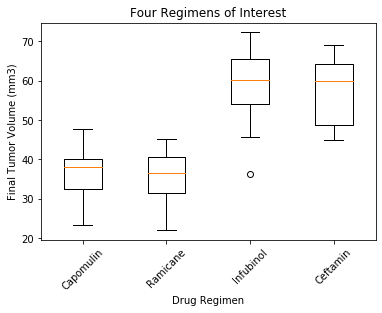

In [112]:
fig1, ax1 = plt.subplots()
ax1.set_title('Four Regimens of Interest')
ax1.boxplot(data)

ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(['Capomulin','Ramicane','Infubinol','Ceftamin'],rotation=45)

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

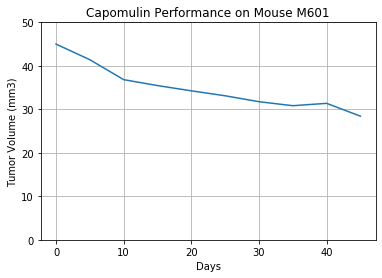

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
m601 = main_data.loc[merged_data['Mouse ID'] == 'm601', ['Timepoint', 'Tumor Volume (mm3)']]
m601 = m601.set_index('Timepoint')

m601_tumor = m601['Tumor Volume (mm3)']

plot_m601 = m601_tumor.plot.line(title='Capomulin Performance on Mouse M601', grid=True, ylim=(0,50))
plot_m601.set_xlabel('Days')
plot_m601.set_ylabel('Tumor Volume (mm3)')


Text(0.5, 1.0, 'Capomulin: Mouse Weight vs. Average Tumor Volume')

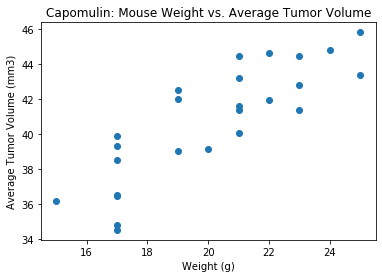

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = main_data.loc[merged_data['Drug Regimen'] == 'Capomulin', 
                               ['Mouse ID','Weight (g)', 'Tumor Volume (mm3)']]


avg_tumor = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()


avg_tumor_df = pd.DataFrame({'weight': weight, 'avg volume': avg_tumor})

x = avg_tumor_df['weight']
y = avg_tumor_df['avg volume']

plt.scatter(x,y)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Mouse Weight vs. Average Tumor Volume')

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

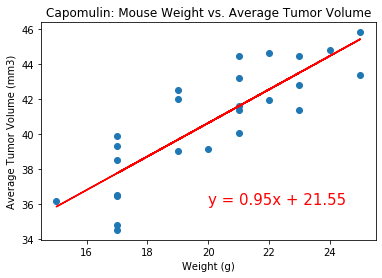


The correlation coefficient between mouse weight and average tumor volume is 0.84.




In [14]:
from scipy.stats import linregress


correlation = st.pearsonr(x,y)
correlation

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Mouse Weight vs. Average Tumor Volume')
plt.show()

print(f'''
The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}.
''')